# Exploratory Data Analysis - Pilot Stocks


In this notebook, we are going to continue doing more exploratory data analysis but now with the merged file from three different datasets. 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

stocks = pd.read_csv("/Users/maralinetorres/Documents/GitHub/Predicting-Environmental-and-Social-Actions/Sprint #5 - Midterm presentations/pilot_stocks.csv")
print(f'The pilot dataset has {stocks.shape[0]} rows and {stocks.shape[1]} columns')
stocks.head(3)

The pilot dataset has 780 rows and 22 columns


,Year,Ticker,Environmental Disclosure Score,GHG Scope 1,Total Energy Consumption,Company,Total_Assets,Net_Income,Total_Sales,Change_in_Sales,...,ROA,Profit_Margin,Annual_Stock_Return,Ratio of GHG Emissions to Total Assets,Ratio of GHG Emissions to Total Sales,Ratio of Total Energy Consumption to Total Assets,Ratio of Total Energy Consumption to Total Sales,Profitable,Logarithm_Total_Assets,Logarithm_Total_Sales
0,2005,AEE,NaN,NaN,NaN,AMEREN CORP,18162.0,619.0,6780.0,0.000000,...,3.408215,9.129794,NaN,NaN,NaN,NaN,NaN,True,9.807087,8.821732
1,2006,AEE,NaN,NaN,NaN,AMEREN CORP,19578.0,558.0,6880.0,1.474926,...,2.850138,8.110465,NaN,NaN,NaN,NaN,NaN,True,9.882162,8.836374
2,2007,AEE,9.7,NaN,NaN,AMEREN CORP,20728.0,629.0,7546.0,9.680233,...,3.034543,8.335542,NaN,NaN,NaN,NaN,NaN,True,9.939241,8.928773


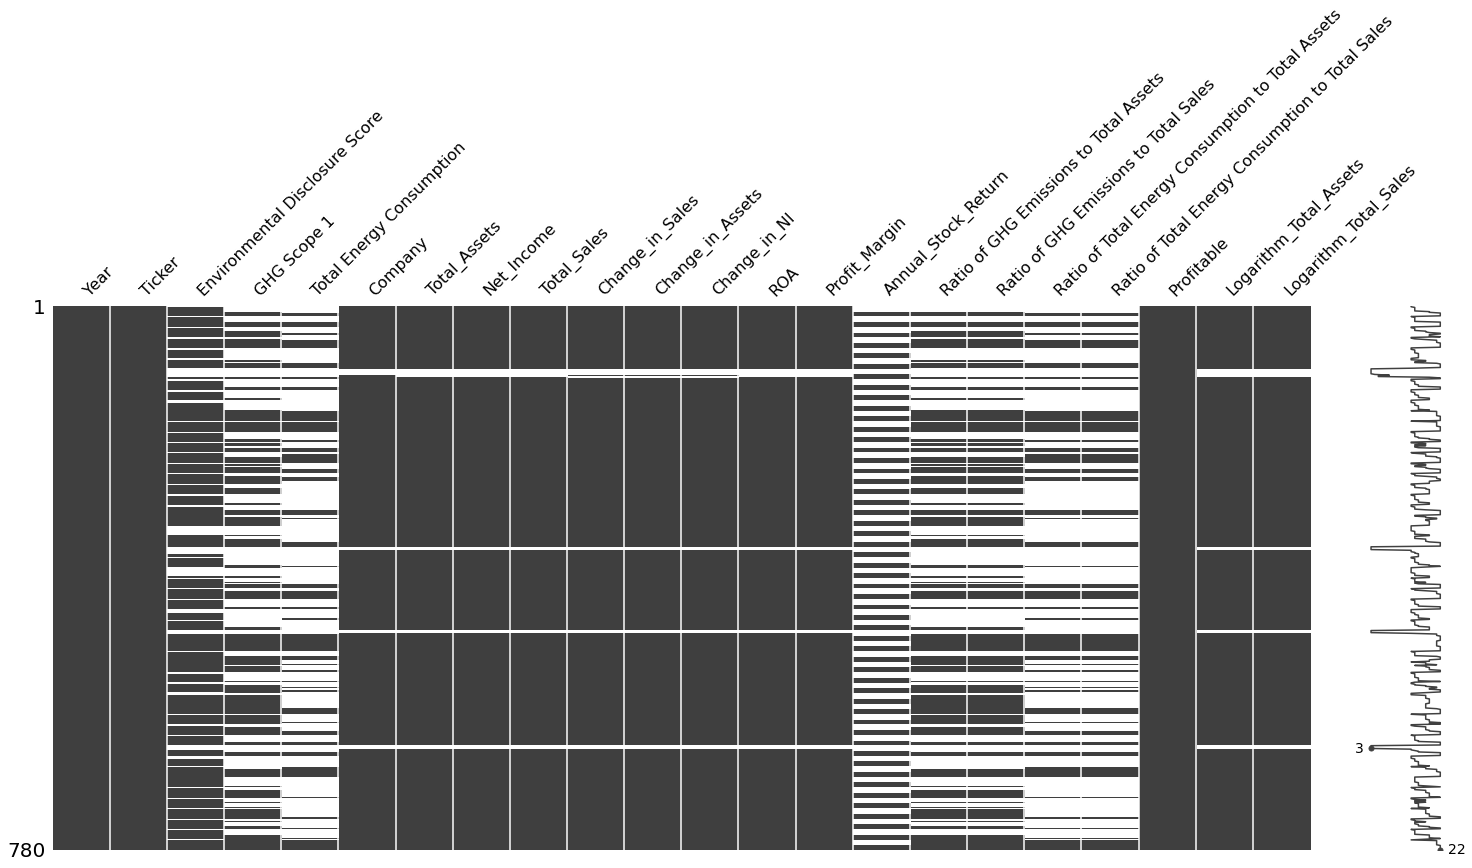

In [4]:
msno.matrix(stocks);

Text(0.5, 1.0, 'Number of years missing GHG Scope data by company')

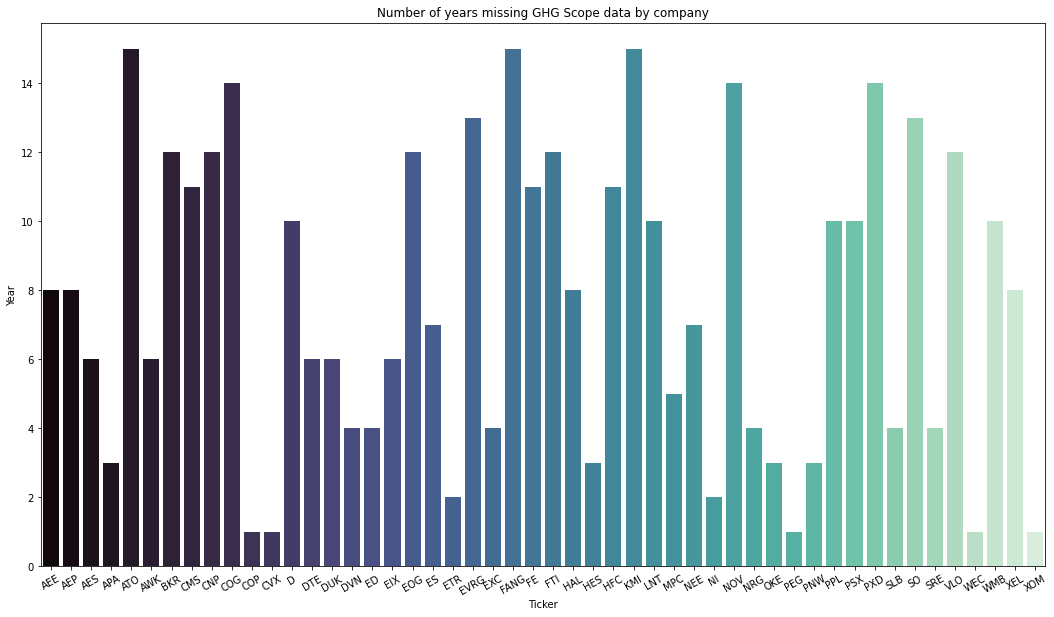

In [26]:
#Get companies that don't have GHG Scope
plt.figure(figsize=(18,10))
stock_missing_ghg = stocks.loc[stocks['GHG Scope 1'].isna(), ['Ticker','Year']].groupby('Ticker').count().reset_index()
sns.barplot(x='Ticker', y='Year', data=stock_missing_ghg, palette='mako')
plt.xticks(rotation = 30)
plt.title('Number of years missing GHG Scope data by company')

In [7]:
stocks.loc[:,['Ticker','Profit_Margin']]
profit_margin_mean = stocks.groupby('Ticker')[['Profit_Margin']].mean().reset_index()
profit_margin_mean.sort_values(by='Profit_Margin', ascending=True)[:5]

,Ticker,Profit_Margin
3,APA,-19.065064
27,HES,-11.564990
32,MRO,-6.199380
23,FANG,-2.399724
35,NOV,0.221848


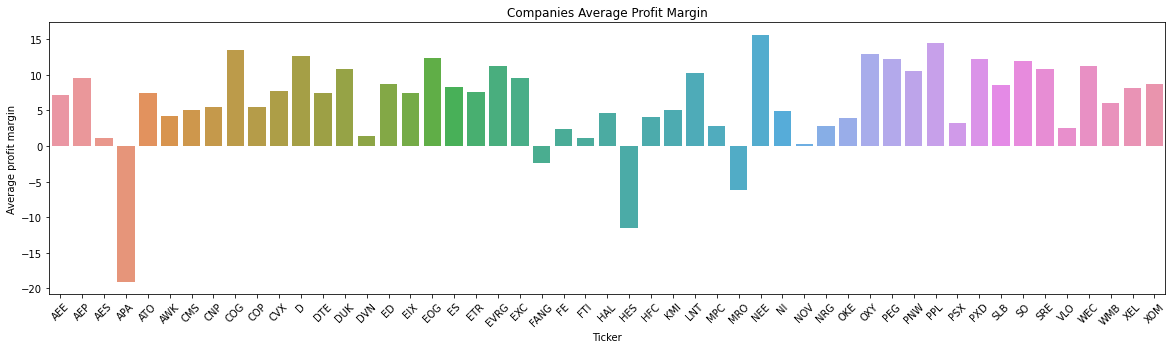

In [10]:
plt.figure(figsize=(20,5))
sns.barplot(x="Ticker", y="Profit_Margin", data=profit_margin_mean.loc[profit_margin_mean.Ticker != 'BKR']);
plt.xticks(rotation=45);
plt.title('Companies Average Profit Margin');
plt.ylabel('Average profit margin');

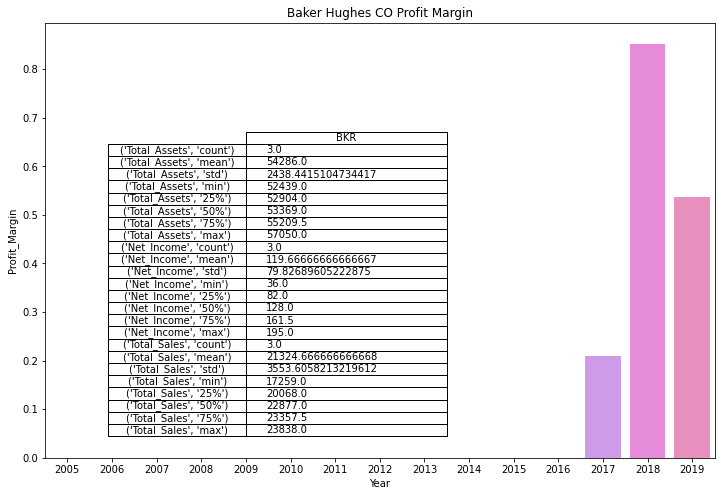

In [16]:
plt.figure(figsize=(12,8))
bkr = stocks.loc[stocks.Ticker == 'BKR', :]
bkr['Year'] = pd.to_datetime(bkr.Year, format='%Y')
bkr['Year'] = bkr.Year.dt.year
x = bkr.groupby('Ticker')[['Total_Assets','Net_Income','Total_Sales']].describe().T
sns.barplot(x='Year',y='Profit_Margin', data = bkr);
plt.table(cellText=x.values,
          rowLabels=x.index,
          colLabels=x.columns,
          cellLoc = 'left', rowLoc = 'center',
          loc='left', bbox=[.30,.05,.3,.7]);
plt.title('Baker Hughes CO Profit Margin');

Text(0.5, 1.0, 'Number of profitable companies by year')

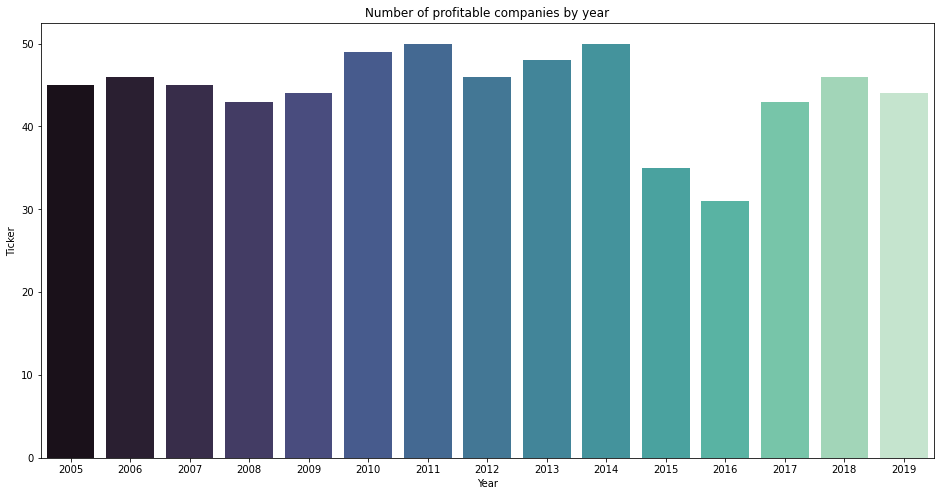

In [20]:
plt.figure(figsize=(16,8))
profitable = stocks[stocks.Profitable == True].groupby('Year')[['Ticker']].count().reset_index()

sns.barplot(x='Year', y='Ticker', data=profitable, palette='mako')
plt.title('Number of profitable companies by year')

Text(0.5, 1.0, 'Number of years missing GHG Scope data by company')

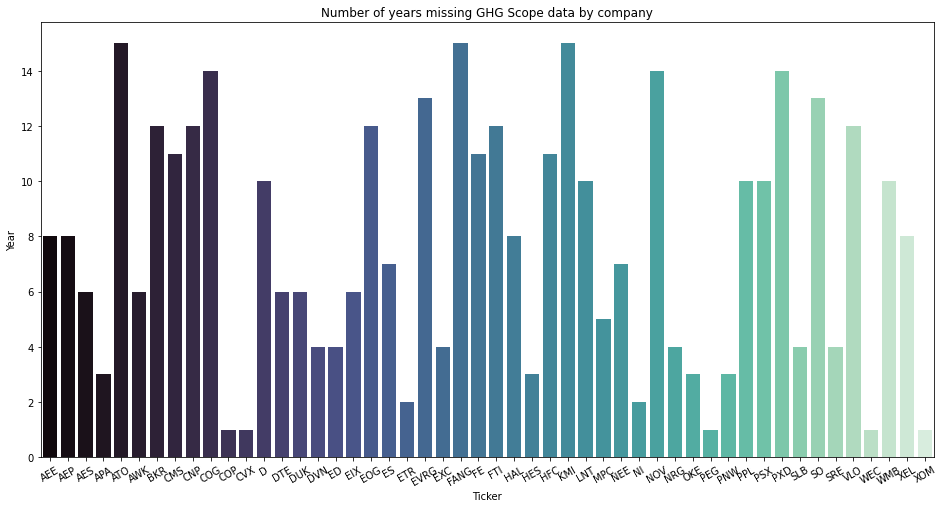